# August Perez Capstone Two Project:
## Asthma prediction model

The goal is to build a model with at least 90% sensitivity (focusing on reducing false negatives)

Data source: Asthma Disease Dataset (https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset?resource=download)

#### About the dataset: (from the kaggle description)
- health information for 2,392 patients
  - includes demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and a diagnosis indicator


Column Info: (from Kaggle description)
Patient ID

    PatientID: A unique identifier assigned to each patient (5034 to 7425).

Demographic Details

    Age: The age of the patients ranges from 5 to 80 years.
    Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    Ethnicity: The ethnicity of the patients, coded as follows:
    0: Caucasian
    1: African American
    2: Asian
    3: Other
    EducationLevel: The education level of the patients, coded as follows:
    0: None
    1: High School
    2: Bachelor's
    3: Higher

Lifestyle Factors

    BMI: Body Mass Index of the patients, ranging from 15 to 40.
    Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
    PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    DietQuality: Diet quality score, ranging from 0 to 10.
    SleepQuality: Sleep quality score, ranging from 4 to 10.

Environmental and Allergy Factors

    PollutionExposure: Exposure to pollution, score from 0 to 10.
    PollenExposure: Exposure to pollen, score from 0 to 10.
    DustExposure: Exposure to dust, score from 0 to 10.
    PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.

Medical History

    FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
    HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
    Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.
    HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.
    GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.

Clinical Measurements

    LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
    LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.

Symptoms

    Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
    ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
    ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.
    Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.
    NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.
    ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.

Diagnosis Information

    Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.

Confidential Information

    DoctorInCharge: This column contains confidential information about the doctor in charge, with "Dr_Confid" as the value for all patients.


#### Imports:

In [1]:
%matplotlib inline

# data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# modeling & pre-processing
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.preprocessing
import sklearn.metrics


#### Set random seed for reproducability
Note that this should not be done for models used in real-world applications

In [2]:
np.random.seed(9)

#### Load the data into a pandas df

In [3]:
df_adhd = pd.read_csv('asthma_disease_data.csv')
df_adhd.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
print('shape:', df_adhd.shape,'\n')
print('columns:\n','\n'.join(list(df_adhd.columns)))
print('\nnumber of cols:', len(df_adhd.columns))

shape: (2392, 29) 

columns:
 PatientID
Age
Gender
Ethnicity
EducationLevel
BMI
Smoking
PhysicalActivity
DietQuality
SleepQuality
PollutionExposure
PollenExposure
DustExposure
PetAllergy
FamilyHistoryAsthma
HistoryOfAllergies
Eczema
HayFever
GastroesophagealReflux
LungFunctionFEV1
LungFunctionFVC
Wheezing
ShortnessOfBreath
ChestTightness
Coughing
NighttimeSymptoms
ExerciseInduced
Diagnosis
DoctorInCharge

number of cols: 29


# Data Wrangling

In [5]:
df_adhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

AP: No null values found, making my job here easier than expected.

In [6]:
# AP: Looking at col names to ensure they make sense
df_adhd.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


##### AP: Col names to edit:
- Change all to lower case (mainly makes my typing easier/faster)
- 

In [7]:
# AP: change col names to lower case
df_adhd.columns = df_adhd.columns.str.lower()
df_adhd.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis,doctorincharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


#### Check the data types, ensure they make sense for the column

In [8]:
df_adhd.dtypes

patientid                   int64
age                         int64
gender                      int64
ethnicity                   int64
educationlevel              int64
bmi                       float64
smoking                     int64
physicalactivity          float64
dietquality               float64
sleepquality              float64
pollutionexposure         float64
pollenexposure            float64
dustexposure              float64
petallergy                  int64
familyhistoryasthma         int64
historyofallergies          int64
eczema                      int64
hayfever                    int64
gastroesophagealreflux      int64
lungfunctionfev1          float64
lungfunctionfvc           float64
wheezing                    int64
shortnessofbreath           int64
chesttightness              int64
coughing                    int64
nighttimesymptoms           int64
exerciseinduced             int64
diagnosis                   int64
doctorincharge             object
dtype: object

##### AP: Data types check out. doctorincharge col has every value as "Dr_Confid" so object type makes sense.

#### Visualize the data
Detection of possible duplicates and outliers

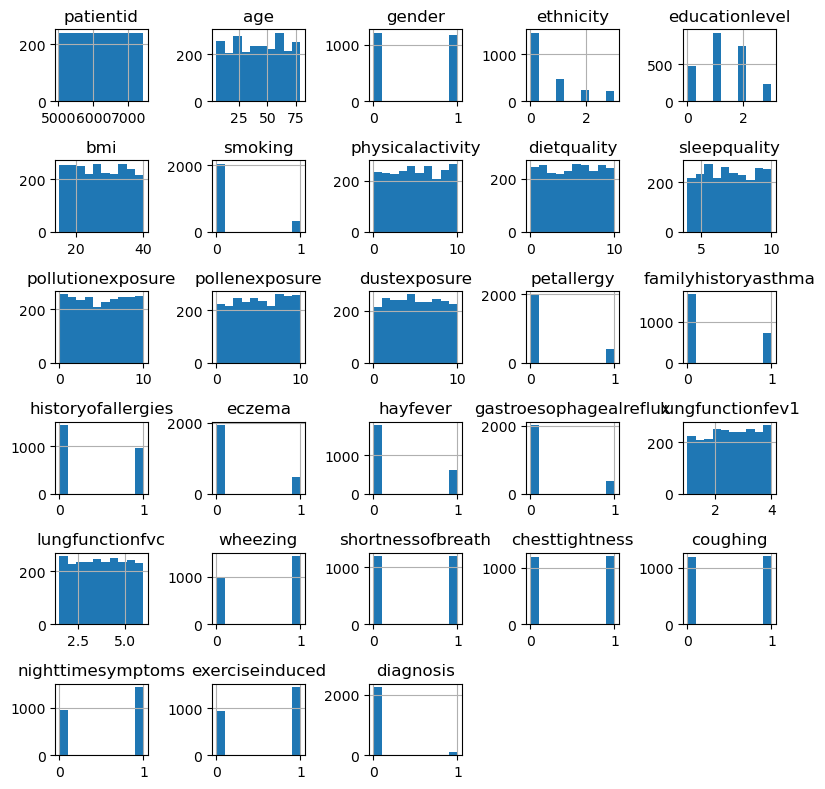

In [9]:
df_adhd.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

AP: Most of the data is categorical between 0 or 1 (yes or no)
Continuous values don't seem to have any specific distribution


In [10]:
# AP: Make list of cols that are non-categorical in nature

non_cat_cols = ['age', 'bmi', 'physicalactivity', 'dietquality', 'sleepquality', 'pollutionexposure', 'pollenexposure', 'dustexposure', 'lungfunctionfev1', 'lungfunctionfvc']

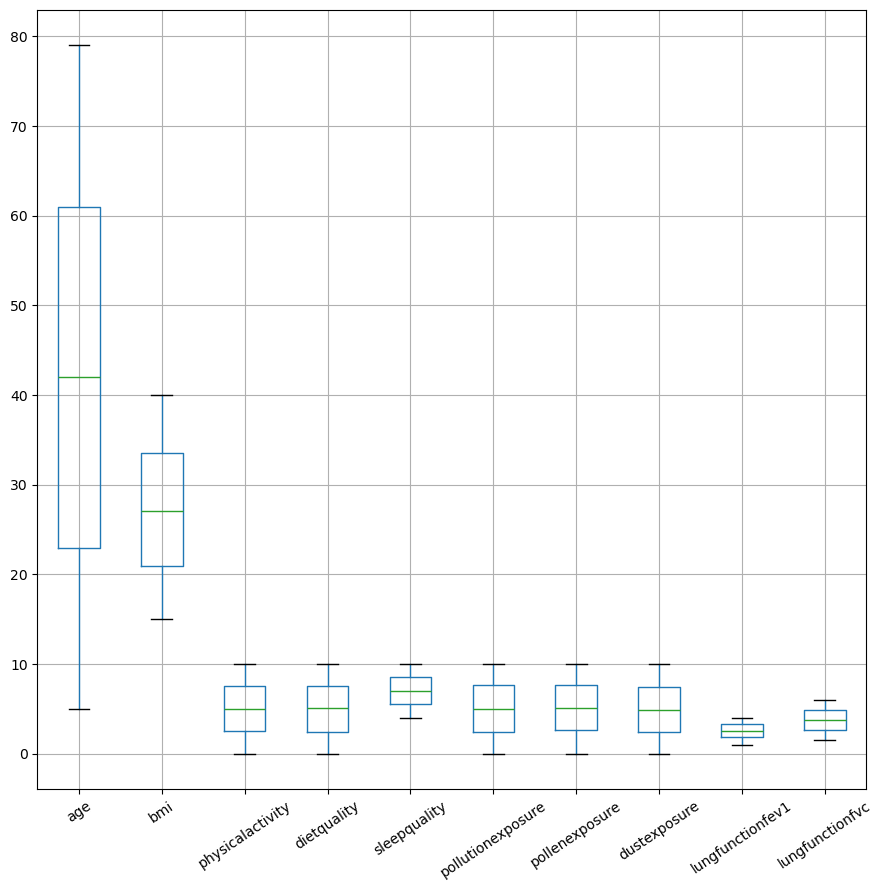

In [11]:
#AP: box & whisker plot to see potential outliers
df_adhd[non_cat_cols].boxplot(figsize=(9,9), rot=34)
plt.tight_layout()
plt.show()

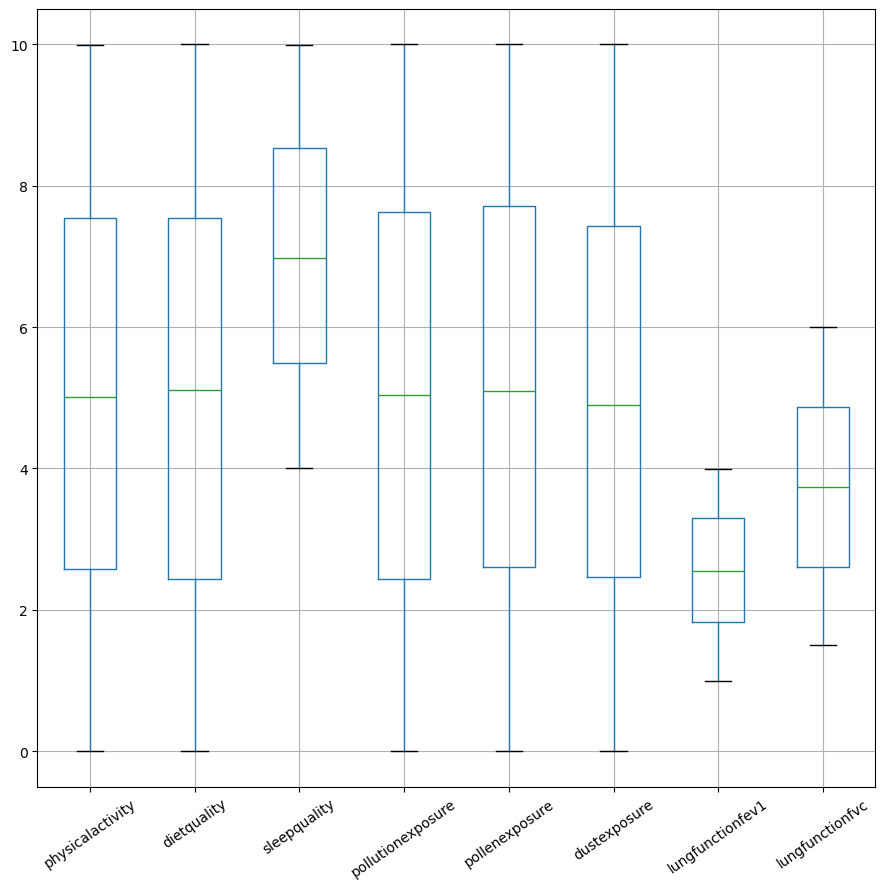

In [12]:
# Boxplot without age & bmi so other columns can be inspected more closely

non_cat_cols_noagebmi = [element for element in non_cat_cols if element != 'age' and element != 'bmi']
df_adhd[non_cat_cols_noagebmi].boxplot(figsize=(9,9), rot=35)
plt.tight_layout()
plt.show()

AP: No outliers seen, max & min's seem reasonable for non-categorical cols

#### A look at consistency in values within columns
ex. categorical values are within specified ranges, numerical values are within reasonable ranges for the metric measured

In [13]:
df_adhd.nunique(axis=0)

patientid                 2392
age                         75
gender                       2
ethnicity                    4
educationlevel               4
bmi                       2392
smoking                      2
physicalactivity          2392
dietquality               2392
sleepquality              2392
pollutionexposure         2392
pollenexposure            2392
dustexposure              2392
petallergy                   2
familyhistoryasthma          2
historyofallergies           2
eczema                       2
hayfever                     2
gastroesophagealreflux       2
lungfunctionfev1          2392
lungfunctionfvc           2392
wheezing                     2
shortnessofbreath            2
chesttightness               2
coughing                     2
nighttimesymptoms            2
exerciseinduced              2
diagnosis                    2
doctorincharge               1
dtype: int64

 AP: The count of unique values within each column is consistent with expectations

## Data Wrangling Conclusions:

- Data is tidy (each observation is a row, each variable is a col)
- No null values found, making my job here easier than expected.
- Data types for each col check out. (all but doctorincharge are numerical int or float) (doctorincharge col has every value as "Dr_Confid" so object type makes sense)
- Continuous values don't seem to have any specific distribution (flat). Most of the data is categorical (17 out of 29 cols) between 0 or 1 (yes or no).
- No outliers detected, max & min's seem reasonable for non-categorical cols
- The count of unique values within each column is consistent with expectations (as many unique values for cat cols as there are categories for that col; and for all but 'age' col, unique values equals sample count)

# EDA

The Data Wrangling performed above did change the dataset in that col names are now all lower case, no other changes were made.

EDA Major Tasks:

1. Form hypotheses/develop investigation themes to explore
2. Exploration of each individual variable
3. Assessment of the relationship between each variable and the target variable
4. Assessment of the interaction between variables
5. Exploration of data across many dimensions

Target Variable: 'diagnosis'

In [14]:
df_adhd.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis,doctorincharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


## List of hypothesis' to consider

- Before fully investigating data: (just looking at rows and columns, plus the quick visualizations from data wrangling steps)
    - a diagnosis of asthma (1) occurs with low lung FEV & FVC
    - a diagnosis of asthma (1) occurs with >1 symptom being present
    - smoking has a high correlation with asthma diagnosis
    - increased bmi is correlated with asthma diagnosis
    - ethnicity does not affect asthma diagnosis
        - acknowledging the possibility of cultural differences that can occur within ethnicity groups that could affect Lifestyle & Environmental and Allergy Factors
- During EDA:
    - fdsf

#### Drop unnecessary cols

cols  only for imformational purposes: (shouldn't be used in calculations/modeling)
- patientid
    - unique identifier that would matter for tracking specific patients, not for model creation (can use the numbered index for that if needed)
- doctorincharge
    - all rows have identical value

In [15]:
df_adhd.drop(['patientid', 'doctorincharge'], axis=1, inplace=True)
df_adhd.head()

,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0


In [16]:
#AP Making lists of categorical features and continuous features

cols_num = []
cols_cat = []

for col in df_adhd.columns:
    if df_adhd[col].nunique() <= 4:
        cols_cat.append(col)
    elif df_adhd[col].nunique() > 4:
        cols_num.append(col)
print('num_cols:\n', cols_num, '\nlen:', len(cols_num))
print('\ncat_cols:\n', cols_cat, '\nlen:', len(cols_cat))

print('\n')
if len(set(cols_num) & set(cols_cat)) > 0:
    print("col split didn't work right")
else:
    print('Good job August!')

num_cols:
 ['age', 'bmi', 'physicalactivity', 'dietquality', 'sleepquality', 'pollutionexposure', 'pollenexposure', 'dustexposure', 'lungfunctionfev1', 'lungfunctionfvc'] 
len: 10

cat_cols:
 ['gender', 'ethnicity', 'educationlevel', 'smoking', 'petallergy', 'familyhistoryasthma', 'historyofallergies', 'eczema', 'hayfever', 'gastroesophagealreflux', 'wheezing', 'shortnessofbreath', 'chesttightness', 'coughing', 'nighttimesymptoms', 'exerciseinduced', 'diagnosis'] 
len: 17


Good job August!


### Explore each variable

#### Descriptive stats

In [20]:
# AP: numerical columns
df_adhd[cols_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
bmi,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
physicalactivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
dietquality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
sleepquality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235
pollutionexposure,2392.0,5.013030,2.935605,0.001022,2.432559,5.036519,7.630037,9.998964
pollenexposure,2392.0,5.114221,2.893088,0.000659,2.599996,5.098452,7.708836,9.999555
dustexposure,2392.0,4.981864,2.859192,0.002434,2.467489,4.903278,7.432218,9.999708
lungfunctionfev1,2392.0,2.548564,0.861809,1.000459,1.824113,2.553244,3.292897,3.999719
lungfunctionfvc,2392.0,3.741270,1.303689,1.500045,2.607489,3.734982,4.864121,5.999421


In [19]:
# AP: categorical columns
df_adhd[cols_cat].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2392.0,0.493311,0.500060,0.0,0.0,0.0,1.0,1.0
ethnicity,2392.0,0.669732,0.986120,0.0,0.0,0.0,1.0,3.0
educationlevel,2392.0,1.307274,0.898242,0.0,1.0,1.0,2.0,3.0
smoking,2392.0,0.141722,0.348838,0.0,0.0,0.0,0.0,1.0
petallergy,2392.0,0.165970,0.372131,0.0,0.0,0.0,0.0,1.0
familyhistoryasthma,2392.0,0.301003,0.458790,0.0,0.0,0.0,1.0,1.0
historyofallergies,2392.0,0.399247,0.489846,0.0,0.0,0.0,1.0,1.0
eczema,2392.0,0.191890,0.393869,0.0,0.0,0.0,0.0,1.0
hayfever,2392.0,0.253344,0.435017,0.0,0.0,0.0,1.0,1.0
gastroesophagealreflux,2392.0,0.158027,0.364842,0.0,0.0,0.0,0.0,1.0


In [22]:
# AP: Change cat cols to dtype 'category' for better describe()

df_adhd[cols_cat].astype('category').describe().T

,count,unique,top,freq
gender,2392,2,0,1212
ethnicity,2392,4,0,1465
educationlevel,2392,4,1,933
smoking,2392,2,0,2053
petallergy,2392,2,0,1995
familyhistoryasthma,2392,2,0,1672
historyofallergies,2392,2,0,1437
eczema,2392,2,0,1933
hayfever,2392,2,0,1786
gastroesophagealreflux,2392,2,0,2014


#### Plotting

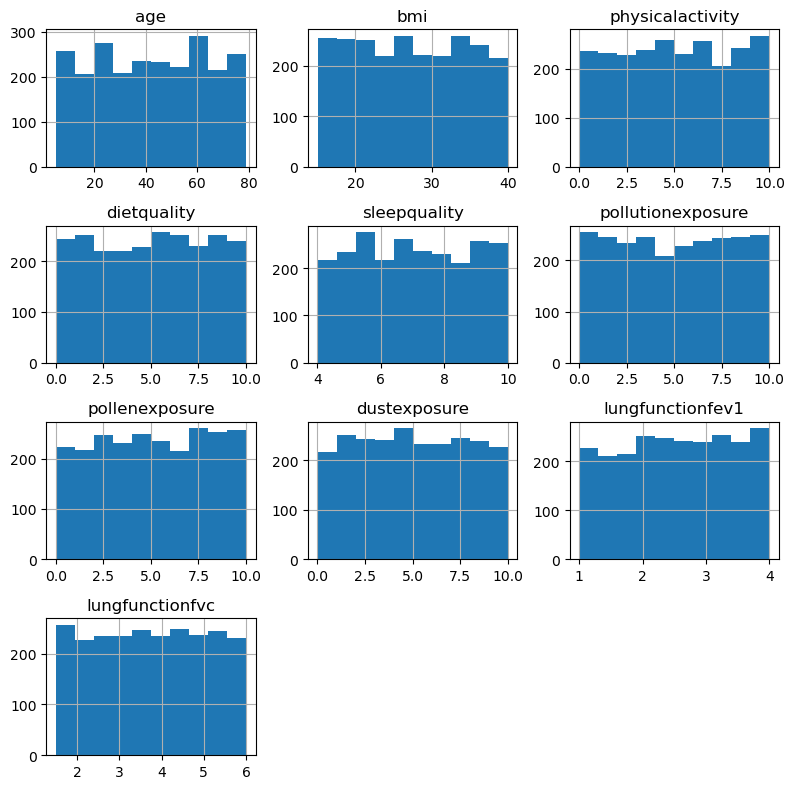

In [23]:
# histograms of numerical cols

df_adhd[cols_num].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

All columns have relatively flat distributions, indicating potentially good sampling technique from the population

### Looking at rows where diagnosis=1 and seeing those relationships

In [24]:
df_adhd_num = pd.concat([df_adhd[cols_num], df_adhd['diagnosis']], axis=1)
df_adhd_cat = pd.concat([df_adhd[cols_cat], df_adhd['diagnosis']], axis=1)

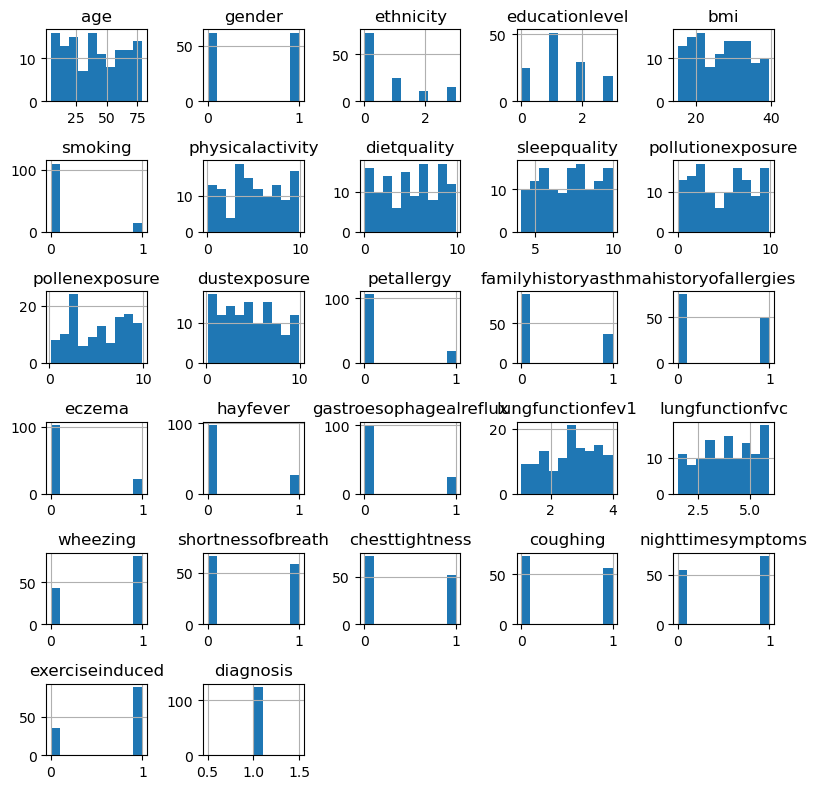

In [28]:
df_adhd[df_adhd['diagnosis']==1].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

This shows a more interesting picture. I'd like to overlay the opposing plot (diagnosis=0) on this to make a comparison (different colors and either step style or play with alpha value)

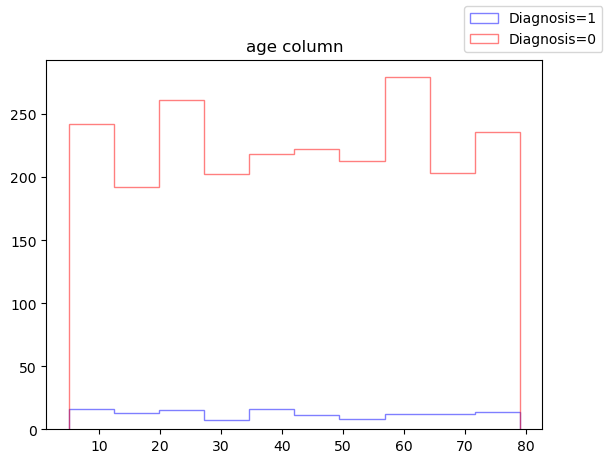

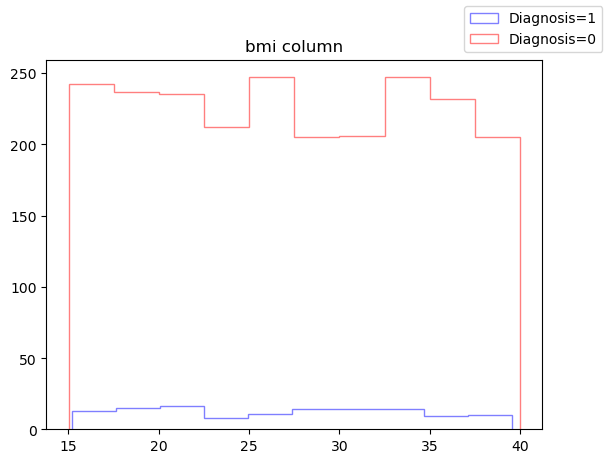

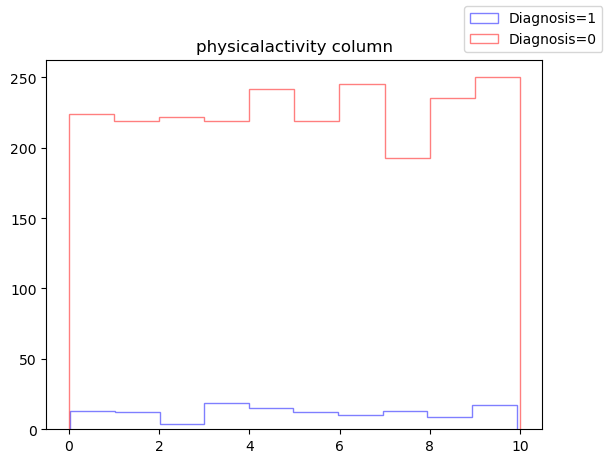

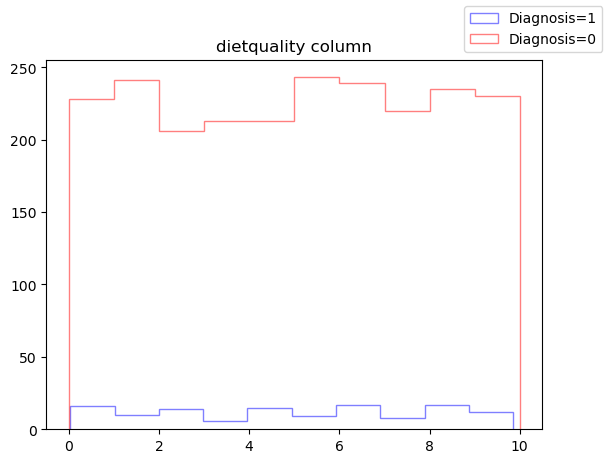

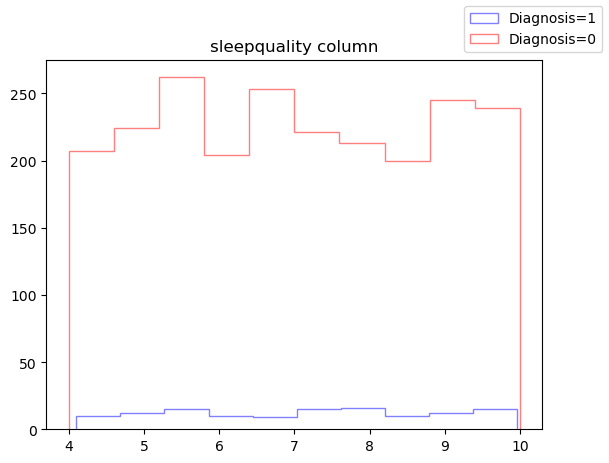

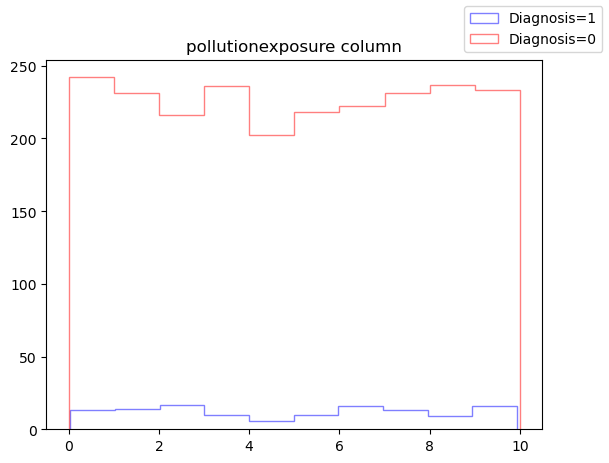

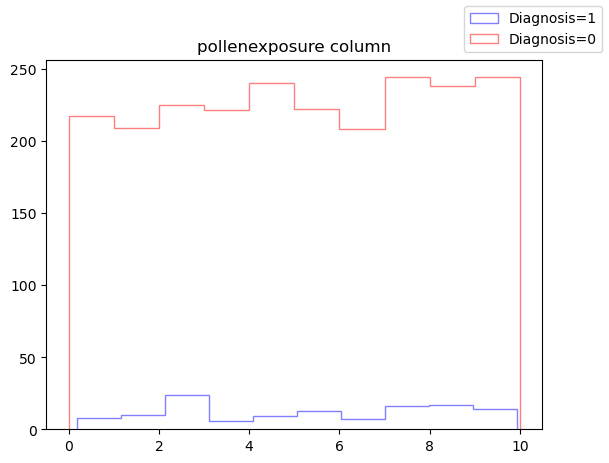

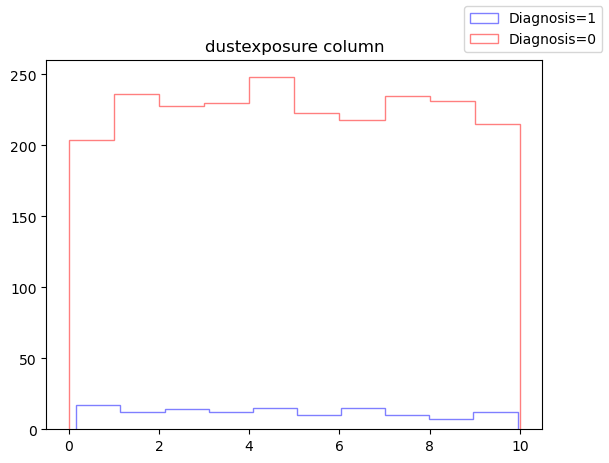

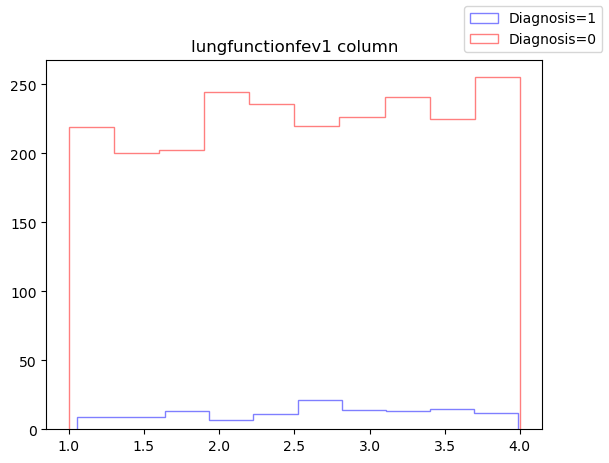

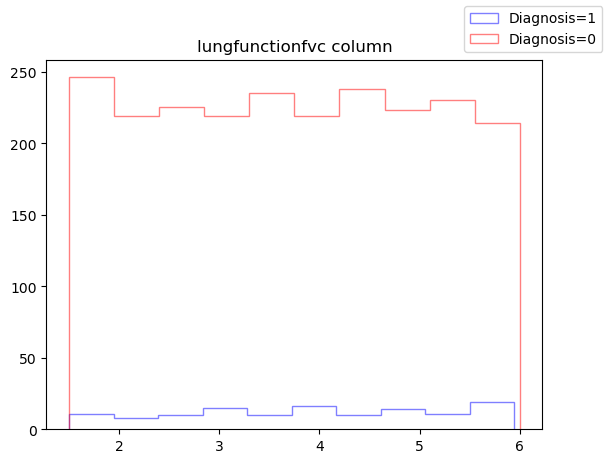

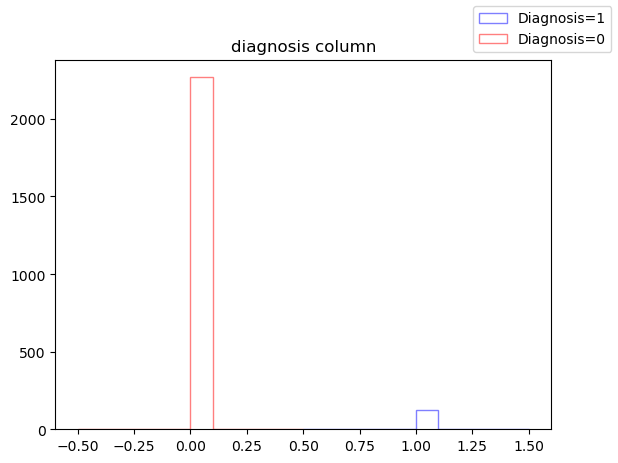

In [29]:
#AP: plotting the numerical columns
for col in df_adhd_num.columns:
    fig, ax = plt.subplots()
    ax.hist(x=col, data=df_adhd_num[df_adhd_num['diagnosis']==1], alpha=0.5, color='b', label='Diagnosis=1', histtype='step')
    ax.hist(x=col, data=df_adhd_num[df_adhd_num['diagnosis']==0], alpha=0.5, color='r', label='Diagnosis=0', histtype='step')
    ax.set_title(f'{col} column')
    fig.legend()

    plt.show()

In [ ]:
plt.clf()
plt.cla()

In [ ]:
#AP: plotting the categorical columns
for col in df_adhd_cat.columns:
    fig, ax = plt.subplots()
    ax.hist(x=col, data=df_adhd_cat[df_adhd_cat['diagnosis']==1], alpha=0.5, color='b', label='Diagnosis=1', histtype='step')
    ax.hist(x=col, data=df_adhd_cat[df_adhd_cat['diagnosis']==0], alpha=0.5, color='r', label='Diagnosis=0', histtype='step')
    ax.set_title(f'{col} column')
    fig.legend()
    plt.show()

In [ ]:
df_adhd[df_adhd['diagnosis']==1].hist(figsize=(8,8), alpha=0.5, histtype='step', color='b', label='Yes Asthma')
df_adhd[df_adhd['diagnosis']==0].hist(figsize=(8,8), alpha=0.5, histtype='step', color='r', label='No Asthma')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_asthma1 = df_adhd[df_adhd['diagnosis']==1]
df_asthma0 = df_adhd[df_adhd['diagnosis']==0]

for col in df_adhd.columns:
    fig, ax = plt.subplots(sharex=True, sharey=True)
    plt.hist(x=df_asthma0[col], histtype='step', label='not asthma')
    #plt.title(f'{col} values where diagnosis = 0')
    #plt.xlabel(col)
    #plt.show()
    plt.hist(x=df_asthma1[col], histtype='step', label='asthma')
    #plt.title(f'{col} values where diagnosis = 1')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

#df_adhd.hist(by='diagnosis', legend=True)
#plt.show()